# 6. Revaluation and Deployment

## 6.1 Imports

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

from sklearn.metrics import confusion_matrix

from Helpers_NN import conf_matrix
from Classification import Classification

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [75]:
sns.set_context('poster')

In [76]:
stacking_model = pickle.load(open('Models/Stacking.pkl','rb'))
neural_net_model = pickle.load(open('Models/Neural_Network.pkl','rb'))

In [77]:
x_test = pd.read_csv('Data/4.x_test_data.csv')
y_test = pd.read_csv('Data/4.y_test_data.csv')
x_test_array = np.load('Data/6.x_test.npy')
y_test_ohe = pd.read_csv('Data/6.y_test_ohe.csv')
y_test_nn = pd.read_csv('Data/6.y_test_nn_df.csv')
y_test_predicted_array = np.load('Data/6.y_test_predicted_array.npy')

## 6.2 Comparing Stacking Model with Neural Network Model

### 6.2.1 Test Accuracy for Stacking Model

In [86]:
stacking_model.get_test_scores(x_test,y_test)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Stacking,0.55467,0.507709,0.046961


,1,2,3,4,5
precision,0.626344,0.441667,0.417098,0.460000,0.600551
recall,0.619681,0.447887,0.428191,0.473008,0.566234
f1-score,0.622995,0.444755,0.422572,0.466413,0.582888


### 6.2.2 Test Accuracy for Neural Network Model

In [81]:
neural_net_model.evaluate(x_test_array,y_test_ohe)

1881/1881 [==============================] - 0s 25us/step


[1.03078889225722, 0.5289739370346069]

### 6.2.3 Confusion Matrix for Stacking Model

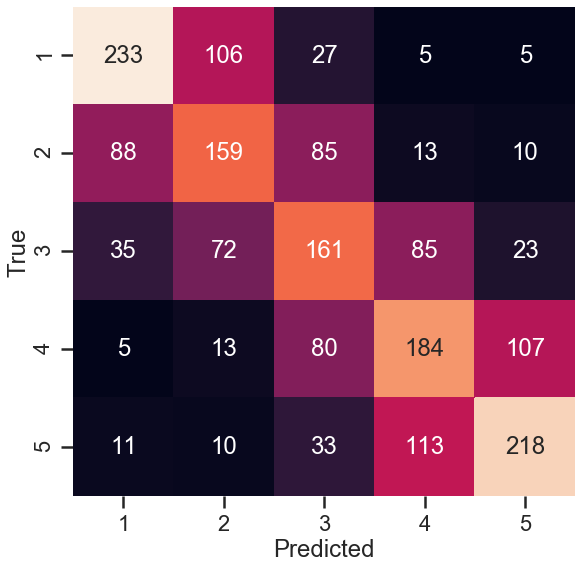

In [82]:
stacking_model.test_conf_matrix()

### 6.2.4 Confusion Matrix for Neural Network Model

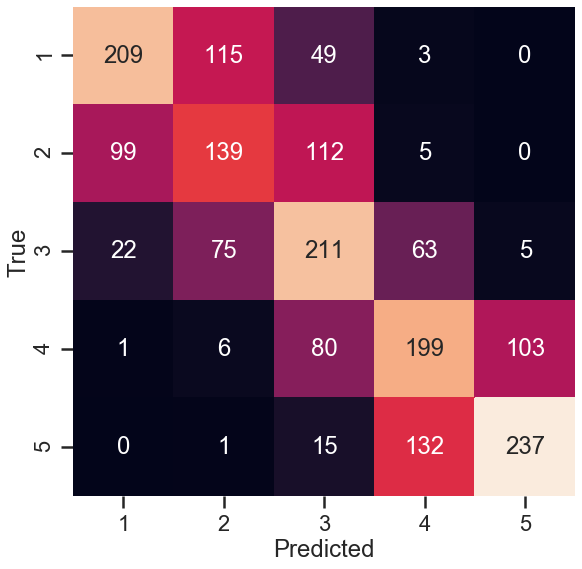

In [85]:
test_cm = confusion_matrix(y_test_nn['score'], y_test_predicted_array)
conf_matrix(test_cm)

## 6.3 Deployment